# Introduction to PyTorch Tensors

- Tensors are the basic units of every PyTorch program.
- Tensors are really similar to the concept of Numpy arrays, the only and most significant difference being: They can be run on the *GPU*.

## First we import PyTorch!

In [3]:
import torch
print(f"Your PyTorch is on version:{torch.__version__}.")

Your PyTorch is on version:2.2.2.


## Dear god, give me a tensor.

In [4]:
myNewTens = torch.empty(2,3)
print(myNewTens.shape)
print(myNewTens.dtype)
print(myNewTens.device)
print(myNewTens.requires_grad)
print(myNewTens.grad)
print(myNewTens) # will contain random garbage since we've not initialized it

torch.Size([2, 3])
torch.float32
cpu
False
None
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Yay! We just created our *first* tensor!

Now lets take a breather and think of what we just did.
- You just created a $2 \times 3$ tensor.
- `shape` tells us the dimensions of the tensor.
- `dtype` tells us the *type* of data stored within this tensor.
- `device` tells us the device on which the tensor is allocated.
- `requires_grad` determines whether gradients must be computed for the tensor.
- `grad` is None on startup but becomes a tensor of gradients after a backward pass.

## Playing around with Tensors

In [5]:
# Create Tensors from Python lists
l = [1, 2, 3]
tensor = torch.Tensor(l)
print(tensor)
# You could even stack multiple lists together and make a multidimensional tensor
l1 = [1, 2, 3]
l2 = [4, 5, 6]
tensor = torch.Tensor([l1, l2])
print(tensor)

tensor([1., 2., 3.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [6]:
# You can create a Tensor filled with random numbers
tensor = torch.rand(2, 3)
print(tensor)

tensor([[0.1264, 0.7393, 0.2339],
        [0.4104, 0.2174, 0.8689]])


In [7]:
# Create a matrix of all zeros
tensor = torch.zeros(2, 3)
print(tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
# Create a matrix of all zeros and explicitly set data type to be double
tensor = torch.zeros(2, 3, dtype=torch.double)
print(tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


### Common Tensor operations

In [11]:
# Finding size of a 1-D tensor
tensor = torch.zeros(2, 3)
print(tensor.size())

# Finding the size of a 2-D tensor
tensor = torch.zeros(2, 3, 4)
print(tensor.size())

# Finding the size of a 3-D tensor
tensor = torch.zeros(2, 3, 4, 5)
print(tensor.size())


torch.Size([2, 3])
torch.Size([2, 3, 4])
torch.Size([2, 3, 4, 5])


In [12]:
# Arithmetic operations on 2 tensors
x = torch.rand(2, 3)
y = torch.rand(2, 3)
z = x + y

print(f"x:\n{x}\n")
print(f"y:\n{y}\n")
print(f"z = x + y:\n{z}\n")

x:
tensor([[0.6493, 0.2840, 0.1096],
        [0.7859, 0.2019, 0.8326]])

y:
tensor([[0.8261, 0.1645, 0.8392],
        [0.5429, 0.2083, 0.4666]])

z = x + y:
tensor([[1.4753, 0.4484, 0.9488],
        [1.3288, 0.4102, 1.2992]])



In [13]:
# Special "inplace" functions

y.add_(x)
print(y)

tensor([[1.4753, 0.4484, 0.9488],
        [1.3288, 0.4102, 1.2992]])


Methods (usually methods ending with an underscore like `add_()`) are called **In-place** operations.
This means that they don't make a *copy* of the result in memory. They literally perform the operation on the `y` matrix. This is crucial for memory sensitive aplications.

Here's a *great* blog on the [Dangers of Inplace Methods](https://lernapparat.de/pytorch-inplace)

In [14]:
# Indexing into a Tensor
x = torch.rand(2, 3)
print(x)
print(x[1, 1])

tensor([[0.1862, 0.1528, 0.3280],
        [0.3070, 0.2629, 0.4457]])
tensor(0.2629)


In [15]:
# Broadcasting tensors
x = torch.rand(2, 3)
y = torch.rand(3)
print(x)
print(y)
z = x + y
print(z)

tensor([[0.4165, 0.0620, 0.7896],
        [0.4939, 0.2519, 0.0606]])
tensor([0.9365, 0.9450, 0.8920])
tensor([[1.3530, 1.0070, 1.6816],
        [1.4304, 1.1970, 0.9526]])


In [16]:
# Reshaping tensors
x = torch.rand(2, 3)
print(x)
y = x.view(3, 2)
print(y)
z = x.view(6)
print(z)
w = x.view(-1, 2) # -1 is inferred from other dimeensions
print(w)

tensor([[0.5438, 0.9323, 0.6202],
        [0.1947, 0.2302, 0.5878]])
tensor([[0.5438, 0.9323],
        [0.6202, 0.1947],
        [0.2302, 0.5878]])
tensor([0.5438, 0.9323, 0.6202, 0.1947, 0.2302, 0.5878])
tensor([[0.5438, 0.9323],
        [0.6202, 0.1947],
        [0.2302, 0.5878]])


In [17]:
import numpy as np

# Create a PyTorch tensor
tensor = torch.ones(5)
print(f"PyTorch Tensor: {tensor}")

# Convert the PyTorch tensor to a NumPy array
numpy_array = tensor.numpy()
print(f"NumPy Array: {numpy_array}")

# Convert a NumPy array to a PyTorch tensor
numpy_array = np.array([1, 2, 3])
tensor = torch.from_numpy(numpy_array)
print(f"Tensor from NumPy Array: {tensor}")


PyTorch Tensor: tensor([1., 1., 1., 1., 1.])


RuntimeError: Numpy is not available

# [Optional] Moving PyTorch Tensors onto the GPU ⚡️
(Applicable only if your system has a CUDA enabled GPU)



In [ ]:
# Check if CUDA is available
if torch.cuda.is_available():
  device = torch.device("cuda")          # a CUDA device object
  x = torch.ones(5, device=device)       # directly create a tensor on GPU
  y = torch.ones(5)
  y = y.to(device)                       # or just use strings ``.to("cuda")``
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
else:
  print("CUDA is not available.")


## Autograd

- PyTorch's Autodiff tool.
- Tracks the operations performed on a tensors in a forward pass.
- When `backward()` is called gradients are auto-computed.

In [19]:
!pip install torchviz

In [20]:
# Create a tensor with autograd enabled
x = torch.tensor(torch.rand(2,3), requires_grad=True)
print(x)

tensor([[0.0014, 0.0051, 0.7028],
        [0.3016, 0.6373, 0.3368]], requires_grad=True)


/var/folders/wz/5btxyf0s4ydgg3zjpmyrn9g40000gn/T/ipykernel_2880/1075081989.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(torch.rand(2,3), requires_grad=True)


In [21]:
# Perform some operation on the tensor and print it
y = x * 2
print(y)

tensor([[0.0028, 0.0102, 1.4056],
        [0.6032, 1.2746, 0.6735]], grad_fn=<MulBackward0>)


In [22]:
# Perform some more combinations of operations
z = y.mean()
print(z)

tensor(0.6617, grad_fn=<MeanBackward0>)


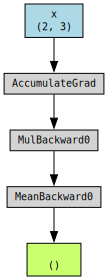

In [24]:
# Now lets see what the computation graph looks like
import torchviz
torchviz.make_dot(z, params={'x': x})

In [25]:
# Perform backpropagation
z.backward()

# Print the gradients of x
print(x.grad)

# Disable gradient tracking
with torch.no_grad():
  x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
  y = x * 2
  print(y.requires_grad)


# Another way to disable gradient tracking
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x.detach() * 2
print(y.requires_grad)

x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
x.requires_grad_(False)
print(x.requires_grad)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])
False
False
True
False
False
